# 探索数据集-泰坦尼克

# 1.简介（Introduction）

## 1.1.数据集

### 1.1.1.数据字段含义

Variable | Definition | Key
---------| -----------|------
PassengerId | Passenger id(旅客编号) |
survival | Survival(旅客) | 0 = No, 1 = Yes
pclass | Ticket class(船票类型) | 1 = 1st, 2 = 2nd, 3 = 3rd
sex	| Sex(性别) |	
Age | Age(年龄) | in years	
sibsp | of siblings / spouses aboard the Titanic(一同上船的兄弟姐妹或配偶) |	
parch | of parents / children aboard the Titanic(一同上船的父母或孩子) |	
ticket | Ticket number(票号) |	
fare | Passenger fare(票价) |	
cabin | Cabin number(船舱) |	
embarked | Port of Embarkation(出发港) | C = Cherbourg, Q = Queenstown, S = Southampton
 


### 1.1.2.变量使用注意事项
**pclass(船票类型): **

A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

**age(年龄):  **

Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp(一同上船的兄弟姐妹或配偶): **

The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

**parch(一同上船的父母或孩子): **

The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## 1.2.研究问题

### 1.2.1.有哪些因素会让船上的人生还率更高？

1.年龄与生还率的关系

2.性别与生还率的关系

3.票价与生还率的关系

## 2.数据整理（Data Wrangling）

## 2.1.数据采集

### 2.1.1.通用函数

In [12]:
'''
汇总常用的数据处理函数
'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
%matplotlib inline


def load_data_csv (filename):
    '''
    加载数据文件
    必须是 csv 文件
    '''
    titanic_df = pd.read_csv(filename)
    return titanic_df


def correlation(x, y):
    '''
    皮尔逊相关系数
    correlation = average of (x in standard units) times(y in standard units)
    std(ddof=0)
    pearson`s r(-1, 1)
    '''
    x_std = (x - x.mean())/x.std(ddof=0)
    y_std = (y - y.mean())/y.std(ddof=0)
    return (x_std * y_std).mean()


### 2.1.2.导入数据

In [23]:
titanic_df = load_data_csv('titanic-data.csv')
#前5行
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.1.3.查看数据常规属性

In [19]:
#末尾5行
titanic_df.tail()
#索引
titanic_df.index
#列
print titanic_df.columns
#底层数据
titanic_df.values
#统计汇总
titanic_df.describe()
#数据转置
# titanic_df.T

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
#按轴进行排序
titanic_df.sort_index(axis=0, ascending=False)
#按值进排序
sv = titanic_df.sort_values(by='Age', axis=0, ascending=True)
sv = titanic_df.sort_values(by=['Age','Fare'], axis=0, ascending=[True,True],na_position='last')
sv.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


In [21]:
#第一行
# titanic_df.iloc[0]
# titanic_df.loc[0]
#指定列
# titanic_df.loc[:, 'Age']
# titanic_df.loc[:, 'Age': "Fare"]
# titanic_df.iloc[:, 0:2]

## 2.2.清理数据

### 2.2.1.异常数据项

**1.Age：**年龄信息有小数和空值需要排除
*需要填充异常空值数据*

**2.Fare：**票价有0的情况
*需要填充异常数据*

**3.Cabin：**船舱号有空的情况
*不做参考因素，不处理*

**4.Embarked：**出发港有空的情况
*不做参考因素，不处理*

**5.Pclass：**船票类型与票价的对应中有高类型对应低票价情况，
*需要排除特别数据*

### 2.2.2.修正数据类型

**1.Age：**填充  异常缺失值

In [37]:
titanic_df.Age.fillna(titanic_df.Age.mean(), inplace=True)
# print Age.sort_values()

**2.Fare：**票价0的数据需要填充

In [38]:
titanic_df.Fare.fillna(titanic_df.Fare.mean(),inplace=True)

## 3.探索性数据分析（EDA, Exploratory Data Analysis）

In [39]:
#生还数据
Survived = titanic_df['Survived']
# print Survived

### 3.1.探索年龄与生还率的关系

#### 3.1.1.探索

d:\ProgramData\Anaconda3\envs\py2\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


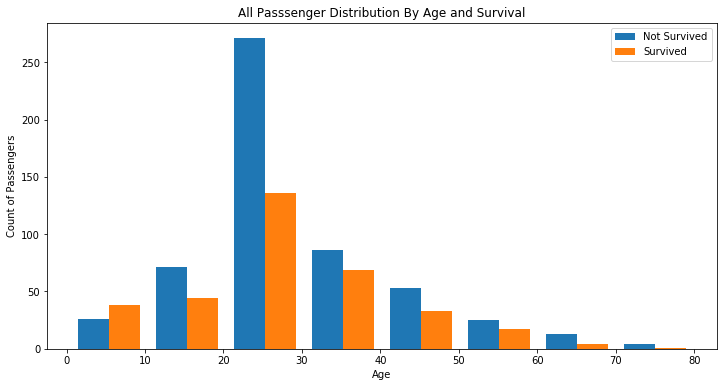

In [44]:
#年龄和生还率的相关性
# r = correlation(titanic_df.Survived, titanic_df.Age)

#幸存者数据和非幸存者数据
age_not_survived = titanic_df[titanic_df.Survived == 0].Age
age_survived = titanic_df[titanic_df.Survived == 1].Age

#柱状图
plt.figure(figsize=(12,6))
plt.hist([age_not_survived, age_survived], stacked=False, bins=8)
plt.title('All Passsenger Distribution By Age and Survival')
plt.xlabel('Age')
plt.ylabel('Count of Passengers')
plt.legend(['Not Survived', 'Survived'])
plt.show()

#### 3.1.2.分析

0-10岁：幸存者比例高

20-40岁：根据图形来看，这个年龄段的乘客最多

20-30岁：幸存者和非幸存者的比例相差最大

其他年龄段的非幸存者比例高

#### 3.1.3.结论

从年龄与幸存者比例看不出年龄与生还率的关联关系


### 3.2.性别与生还率的关系

#### 3.2.1.探索

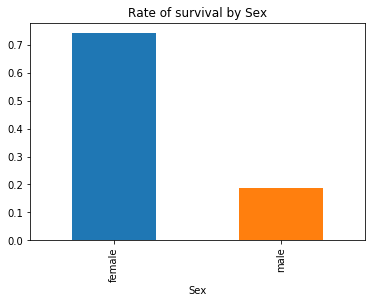

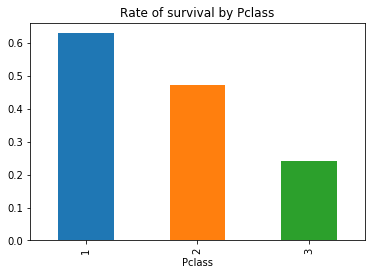

In [45]:
#根据性别分组
def plotRate(feature):
    '''
    计算生存率和显示柱状图
    '''
    survived_by_feature = titanic_df.groupby(feature).mean()['Survived']
    survived_by_feature.plot(kind='bar')
    plt.title('Rate of survival by '+feature)
    plt.show()

plotRate('Sex')
plotRate('Pclass')

#### 3.2.2.分析

根据根据女性的生还率:93.1818% 大于男性生还率:43.1579%

#### 3.2.3.结论

女性生还率比男性高


### 3.3.票价与生还率的关系

#### 3.2.1.探索

In [20]:
#生还数据
Survived = titanic_df['Survived'].dropna(axis=0, how=any)
# print Survived
#票价数据
Fare = titanic_df['Fare'].dropna(axis=0, how=any)
# print Fare

#票价和生还率的相关性
r = correlation(Survived, Fare)
print r

0.257306522385


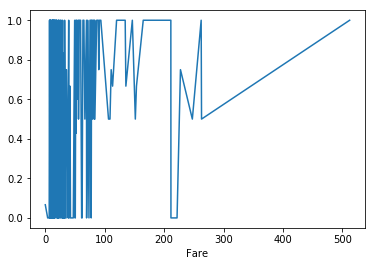

In [21]:
survived_by_fare = titanic_df.groupby('Fare').mean()['Survived']
# print survived_by_fare


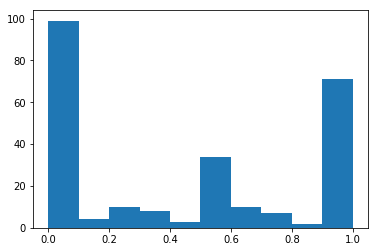

In [22]:
#直方图
plt.hist(survived_by_fare)
plt.show()

#### 3.2.2.分析

根据皮尔逊相关系数 r = 0.134241052835 接近0

#### 3.2.3.结论

票价与生还率的相关度较低，高票价不意味着生还率


## 4.结论（Conclusion）

### 4.1.总结

1.性别会影响生还率，女性的生还率要高

2.票价和年龄和生还率的关系不大

遇到危难的时候，让女性首先获取生还的可能，这个可能是造成女性生还率高的原因。

### 4.2.预测


## 5.研究结果交流